In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/mlb-hitting-and-pitching-stats-through-the-years/baseball_pitcher.csv
/kaggle/input/mlb-hitting-and-pitching-stats-through-the-years/baseball_hitting.csv


# Data Loading + Exploration

In [2]:
hdf = pd.read_csv('/kaggle/input/mlb-hitting-and-pitching-stats-through-the-years/baseball_hitting.csv')

Find the dtypes for each column. The majority of columns in this dataset should be float64, int, or some other numeric datatype.

In [3]:
hdf.dtypes

Player name               object
position                  object
Games                    float64
At-bat                   float64
Runs                     float64
Hits                     float64
Double (2B)              float64
third baseman            float64
home run                 float64
run batted in            float64
a walk                   float64
Strikeouts                object
stolen base              float64
Caught stealing           object
AVG                      float64
On-base Percentage       float64
Slugging Percentage      float64
On-base Plus Slugging    float64
dtype: object

In [4]:
# Convert Strikeouts and Caught Stealing to float64
hdf['Strikeouts'] = pd.to_numeric(hdf['Strikeouts'], errors='coerce')
hdf['Caught stealing'] = pd.to_numeric(hdf['Caught stealing'], errors='coerce')

Here we will calculate a few efficiency metrics to describe hitting efficiency per at bat for 
each hit type

* single
* double
* triple
* home run

We will also include other on base or base movement events including

* walks
* runs batted in

In [5]:
# Use loc to replace atbat in place. This allows us to use a pandas query
hdf.loc[:, 'at_bat'] = hdf['At-bat']

# Create a new dataframe filtered to players who have > 1000 at bats
hdf1 = hdf.query('at_bat > 1000.0').copy()

In [6]:
# Home runs per at bat
hdf1['hr_per_ab'] = hdf1['home run'] / hdf1['at_bat']

# Singles per at bat
# Singles have to be calculated by subtracting other kinds of hits from total hits
hdf1['singles'] = hdf1['Hits'] - hdf1['Double (2B)'] - hdf1['third baseman'] - hdf1['home run']
hdf1['singles_per_ab'] = hdf1['singles']/hdf1['at_bat']

# Doubles per at bat
hdf1['doubles_per_ab'] = hdf1['Double (2B)']/hdf1['at_bat']

# Triples per at bat
hdf1['triples_per_ab'] = hdf1['third baseman']/hdf1['at_bat']

# Walks per at bat
hdf1['walks_per_ab'] = hdf1['a walk']/hdf1['at_bat']

# RBIs per at bat
hdf1['rbi_per_ab'] = hdf1['run batted in']/hdf1['at_bat']

# Strikeouts per at bat
hdf1['strikeouts_per_ab'] = hdf1['Strikeouts']/hdf1['at_bat']

# Offensive output per at bat
# This is an attempt at an offensive output per at bat metric. It will simply add the per at bat 
# metrics
hdf1['output_per_ab'] = hdf1['hr_per_ab'] + hdf1['singles_per_ab'] + hdf1['doubles_per_ab'] + \
                        hdf1['triples_per_ab'] + hdf1['walks_per_ab'] + hdf1['rbi_per_ab']

Now we're going to create a dataset for our visualizations isolating the metrics we just created and their corresponding raw numbers.

In [7]:
hdf2 = hdf1[['Player name', 'position', 'Games', 'at_bat',
             'singles', 'Double (2B)', 'third baseman', 'home run',
             'run batted in']].copy()

hdf3 = hdf1[['Player name', 'position', 'Games', 'at_bat',
            'hr_per_ab', 'singles_per_ab', 'doubles_per_ab', 
             'triples_per_ab', 'walks_per_ab', 'rbi_per_ab', 'strikeouts_per_ab', 
             'output_per_ab']].sort_values('hr_per_ab', ascending=False).reset_index(drop=True)

# Visualizations

I'll be using Seaborn to build visualizations. Here we just want to take a look at any trends we see in the per at bat metrics. 

The ones we'll be focusing on are:
* Highest rated individual players
* Highest rated position group

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.patches as mpatches

Since we're going to be doing quite a bit of plotting with our per at bat metrics, I'm going to create a dataframe with an descending order of each of the metrics.We also need to reset the index for each one. 

This will ensure we get a nice descending order for all our charts

In [9]:
hdf3 = hdf1[['Player name', 'position', 'Games', 'at_bat',
            'hr_per_ab', 'singles_per_ab', 'doubles_per_ab', 
             'triples_per_ab', 'walks_per_ab', 'rbi_per_ab', 'strikeouts_per_ab', 
             'output_per_ab']].sort_values('hr_per_ab', ascending=False).reset_index(drop=True)

hdf4 = hdf3.sort_values('singles_per_ab', ascending=False).reset_index(drop=True)
hdf5 = hdf3.sort_values('doubles_per_ab', ascending=False).reset_index(drop=True)
hdf6 = hdf3.sort_values('triples_per_ab', ascending=False).reset_index(drop=True)
hdf7 = hdf3.sort_values('hr_per_ab', ascending=False).reset_index(drop=True)
hdf8 = hdf3.sort_values('walks_per_ab', ascending=False).reset_index(drop=True)
hdf9 = hdf3.sort_values('rbi_per_ab', ascending=False).reset_index(drop=True)

hdf4.head()

,Player name,position,Games,at_bat,hr_per_ab,singles_per_ab,doubles_per_ab,triples_per_ab,walks_per_ab,rbi_per_ab,strikeouts_per_ab,output_per_ab
0,W Keeler,RF,1160.0,8591.0,0.003841,0.292515,0.028053,0.016878,0.060994,0.094285,0.004190,0.496566
1,B Hamilton,CF,102.0,6269.0,0.006381,0.284256,0.038603,0.015154,0.189344,0.117882,0.034774,0.651619
2,B Hamilton,CF,102.0,6269.0,0.006381,0.284256,0.038603,0.015154,0.189344,0.117882,0.034774,0.651619
3,J Burkett,LF,707.0,8421.0,0.008906,0.269920,0.038000,0.021613,0.122195,0.113051,0.027313,0.573685
4,T Cobb,CF,3034.0,11429.0,0.010237,0.267215,0.063260,0.025987,0.109283,0.169569,0.031236,0.645551


Let's take a look at a histogram to get a better idea of the shape of the data

## Distribution

<AxesSubplot: xlabel='output_per_ab', ylabel='Count'>

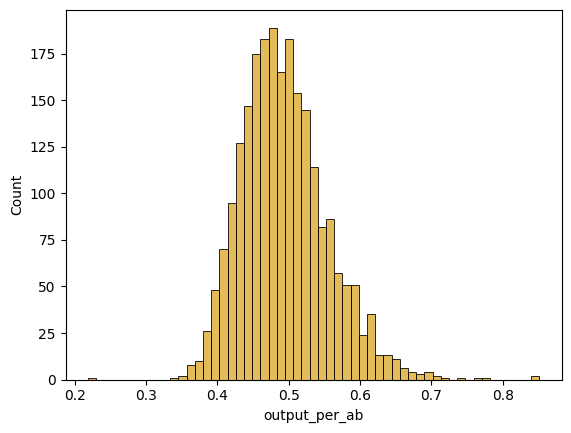

In [10]:
sns.histplot(data=hdf3, x='output_per_ab', color='goldenrod')

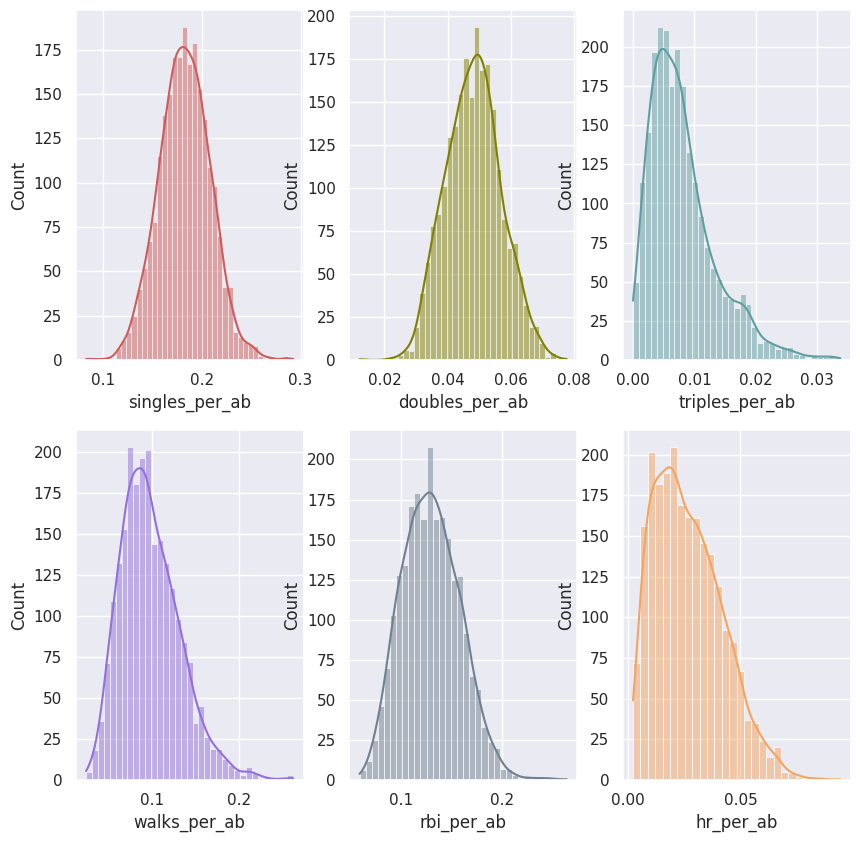

In [11]:
sns.set_theme(style='darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.histplot(data=hdf3, x="singles_per_ab", kde=True, color='indianred', ax=axs[0, 0])
sns.histplot(data=hdf3, x="doubles_per_ab", kde=True, color='olive', ax=axs[0, 1])
sns.histplot(data=hdf3, x="triples_per_ab", kde=True,color='cadetblue', ax=axs[0, 2])
sns.histplot(data=hdf3, x="walks_per_ab", kde=True, color='mediumpurple',ax=axs[1, 0])
sns.histplot(data=hdf3, x="rbi_per_ab", kde=True, color='slategray',ax=axs[1, 1])
sns.histplot(data=hdf3, x="hr_per_ab", kde=True, color='sandybrown',ax=axs[1, 2])

plt.show()

## Top Players

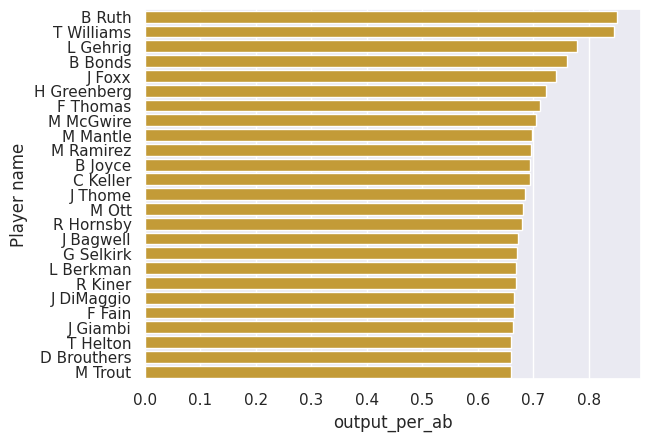

In [12]:
sns.barplot(data=hdf3.nlargest(25, 'output_per_ab'), x='output_per_ab', y='Player name', 
           errorbar=None, orient="h", color='goldenrod')

plt.show()

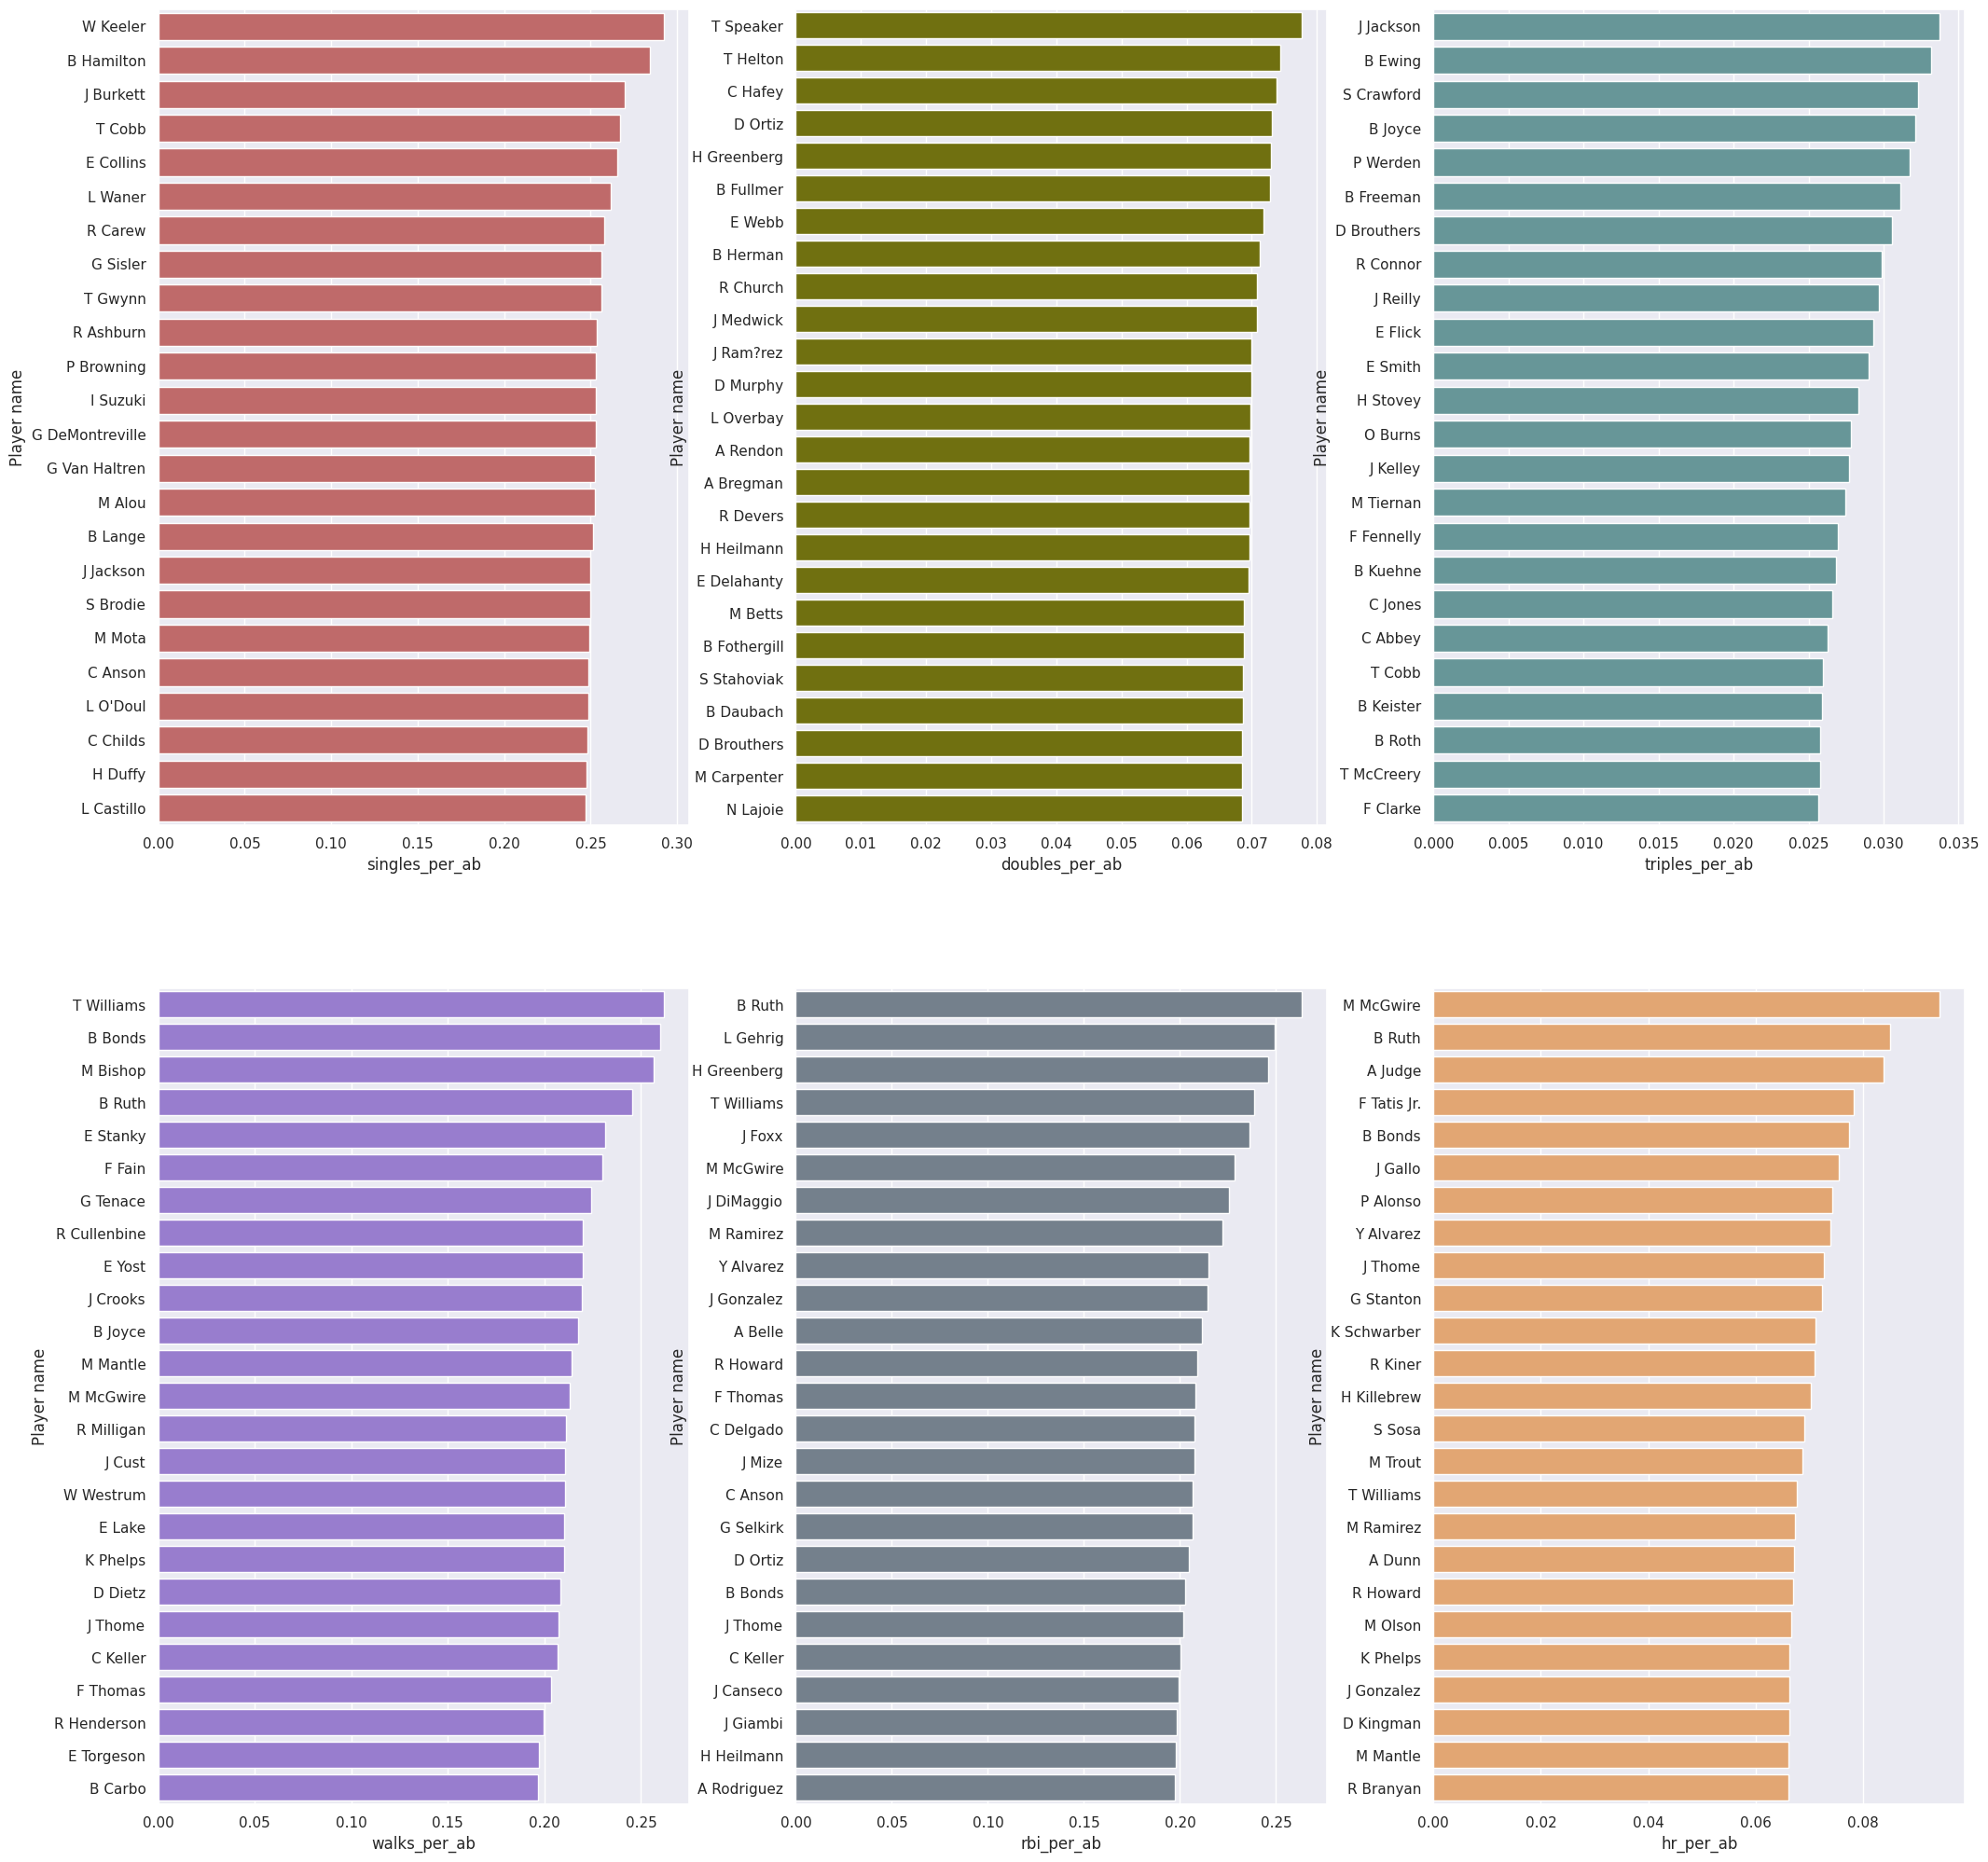

In [13]:
sns.set_theme(style='darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(25, 25))


sns.barplot(data=hdf4.nlargest(25, 'singles_per_ab'), x='singles_per_ab', y='Player name',
           errorbar=None, orient='h', color='indianred', ax=axs[0, 0])
sns.barplot(data=hdf5.nlargest(25, 'doubles_per_ab'), x='doubles_per_ab', y='Player name',
           errorbar=None, orient='h', color='olive', ax=axs[0, 1])
sns.barplot(data=hdf6.nlargest(25, 'triples_per_ab'), x='triples_per_ab', y='Player name',
           errorbar=None, orient='h', color='cadetblue', ax=axs[0, 2])
sns.barplot(data=hdf7.nlargest(25, 'walks_per_ab'), x='walks_per_ab', y='Player name',
           errorbar=None, orient='h', color='mediumpurple', ax=axs[1, 0])
sns.barplot(data=hdf8.nlargest(25, 'rbi_per_ab'), x='rbi_per_ab', y='Player name',
           errorbar=None, orient='h', color='slategray', ax=axs[1, 1])
sns.barplot(data=hdf9.nlargest(25, 'hr_per_ab'), x='hr_per_ab', y='Player name',
           errorbar=None, orient='h', color='sandybrown', ax=axs[1, 2])

plt.show()

# Conclusion

Even when calculating a simple per at-bat output metric, the greats of the game still shine the brightest. 

The top 5 greatest MLB hitters by output per at bar are:
- Babe Ruth
- Ted Williams
- Lou Gehrig
- Barry Bonds
- Jimmie Foxx

This is far from a perfect metric. It doesn't take into account the individual value of each type of hit, but this is undoubtedly a list of all time greats. 4/5 are enshrined in Cooperstown and the last one should be.

It's too bad more players from the current generation didn't crack the top of the total output list, but modern era players dominate the Home Runs per at bat metric.

# Further Exploration

There are a few areas of improvement and future exploration of total output. At this time, I see the best being:
- Exploring the effect of pitching stats on output
- Adjusting metrics to some kind of adjusted ERA to account for differences in pitching for a more adjusted ranking
- Breaking up the players into different eras and ranking by era